In [167]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

%matplotlib inline

# 1. GOAT

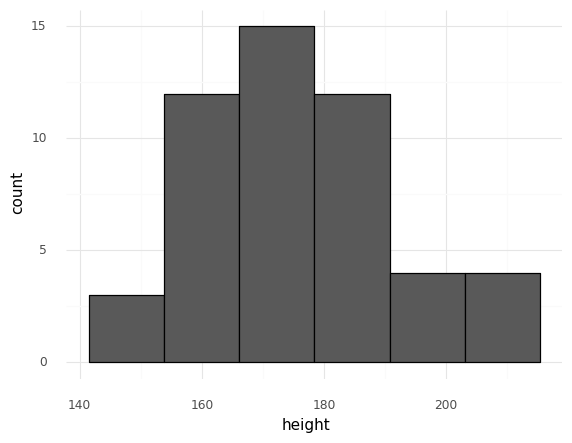

<ggplot: (-9223372036521584682)>

In [168]:
# DATA
hw = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heightWeight.csv")

zScore = StandardScaler()
(ggplot(hw, aes(x = "height")) + geom_histogram(color = "black") + theme_minimal())

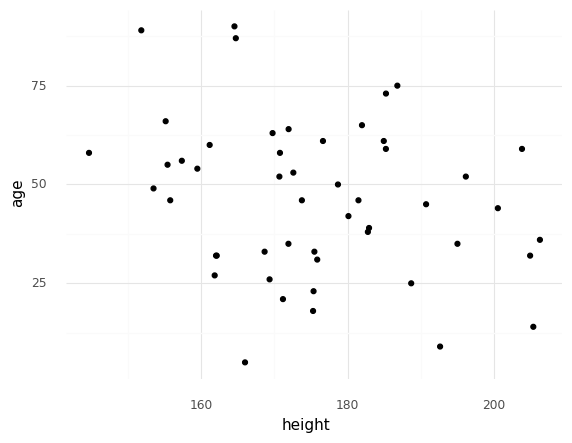

<ggplot: (333452748)>

In [169]:
(ggplot(hw, aes(x = "height", y = "age")) + geom_point() + theme_minimal())

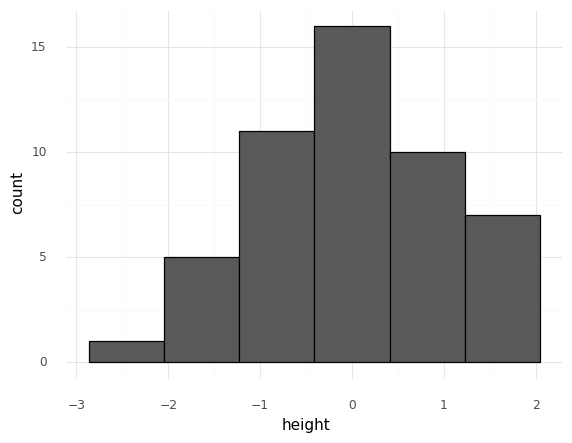

<ggplot: (335908819)>

In [170]:
zScore.fit(hw[["height","age"]]) #only standardize variables that are numeric
hw[["height", "age"]] = zScore.transform(hw[["height", "age"]])
(ggplot(hw, aes(x = "height")) + geom_histogram(color = "black") + theme_minimal())

Notice that Z-scoring doesn't change the shape of the data, just the scale (x-axis) it's measured with. Similarly, see below to see that z scoring also doesn't change the relationship between two variables. This means that while z scoring is useful for putting variales on similar scales it will NOT impact the shape of the data, nor their relationships with other variables.

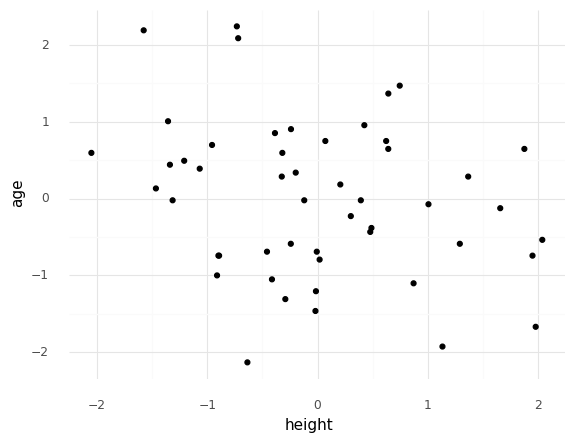

<ggplot: (-9223372036518873298)>

In [171]:
(ggplot(hw, aes(x = "height", y = "age")) + geom_point() + theme_minimal())

# Amazon Books (sklearn)

In [172]:
# Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")

In [173]:
ama.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [174]:
ama.isnull().sum(axis = 0)

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [175]:
ama = ama.dropna() #drop missing values


## Explore

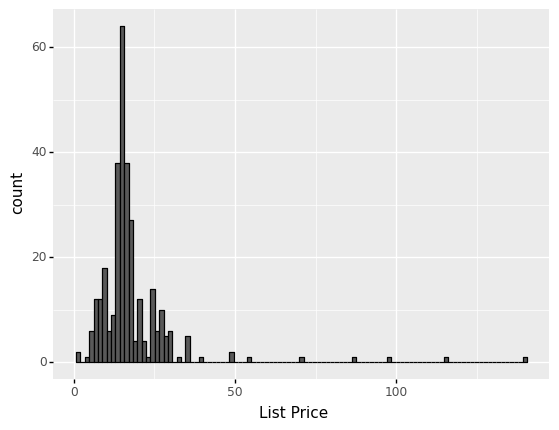

<ggplot: (-9223372036518886021)>

In [176]:
(ggplot(ama, aes("List Price")) + geom_histogram(color = "black"))

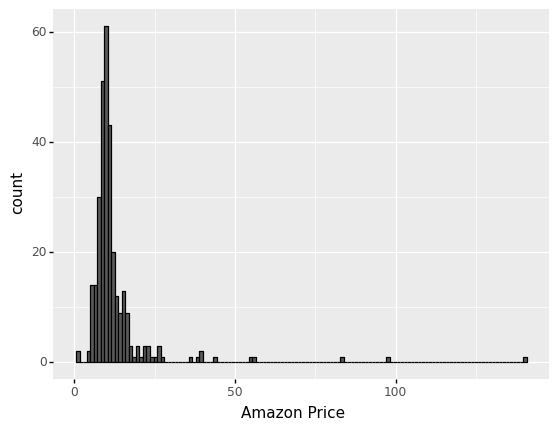

<ggplot: (-9223372036521435476)>

In [177]:
(ggplot(ama, aes("Amazon Price")) + geom_histogram(color = "black"))

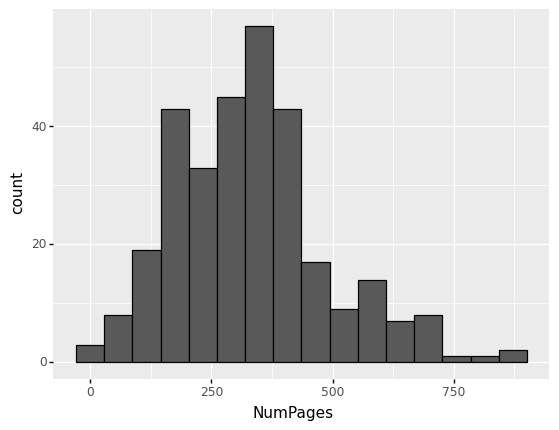

<ggplot: (333303893)>

In [178]:
(ggplot(ama, aes("NumPages")) + geom_histogram(color = "black"))

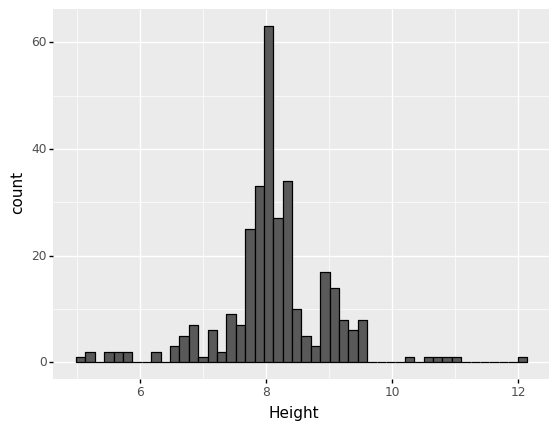

<ggplot: (333082390)>

In [179]:
(ggplot(ama, aes("Height")) + geom_histogram(color = "black"))

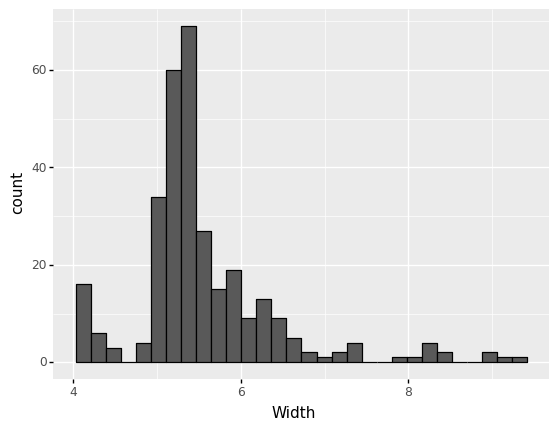

<ggplot: (-9223372036519141267)>

In [180]:
(ggplot(ama, aes("Width")) + geom_histogram(color = "black"))

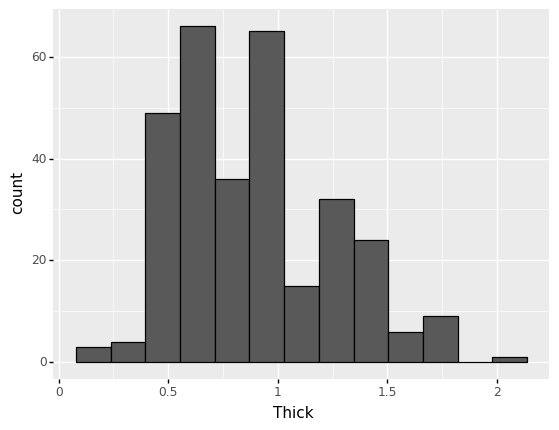

<ggplot: (-9223372036521378409)>

In [181]:
(ggplot(ama, aes("Thick")) + geom_histogram(color = "black"))

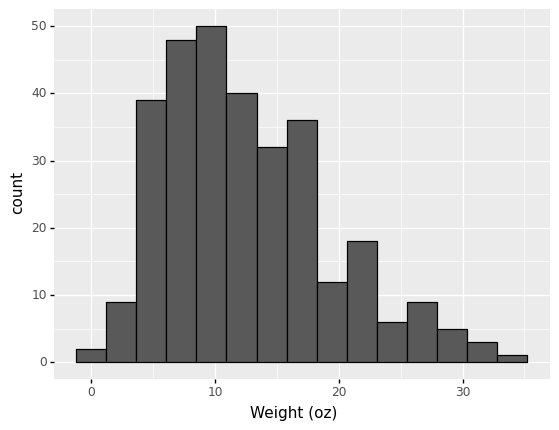

<ggplot: (333191011)>

In [182]:
(ggplot(ama, aes("Weight (oz)")) + geom_histogram(color = "black"))

## Model

In [183]:
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]
X = ama[predictors]
Y = ama["Amazon Price"]

In [184]:
zScore = StandardScaler()
zScore.fit(X)
Xz = zScore.transform(X)

In [185]:
LR_Model = LinearRegression()

In [186]:
LR_Model.fit(Xz,Y)

LinearRegression()

### Model Evaluation

In [187]:
price_pred = LR_Model.predict(Xz)
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [188]:
mean_squared_error(Y,price_pred)

10.61233860175146

In [189]:
r2_score(Y,price_pred)

0.9205886088486431

#### Assumption Checks

First, a note about normality.

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
##### Make Data Frame

In [190]:
# make residual plot
assump = pd.DataFrame({"error": Y- price_pred, "predicted": price_pred})

##### Normality of Residuals

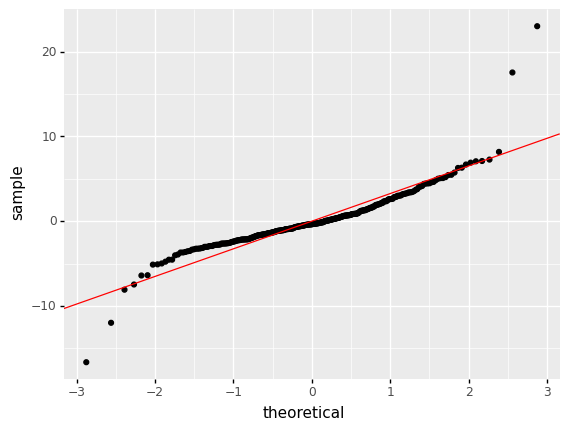

<ggplot: (335636186)>

In [191]:
(ggplot(assump, aes(sample = "error")) + stat_qq() + geom_abline(intercept = 0, slope = np.std(assump["error"]), color = "red"))

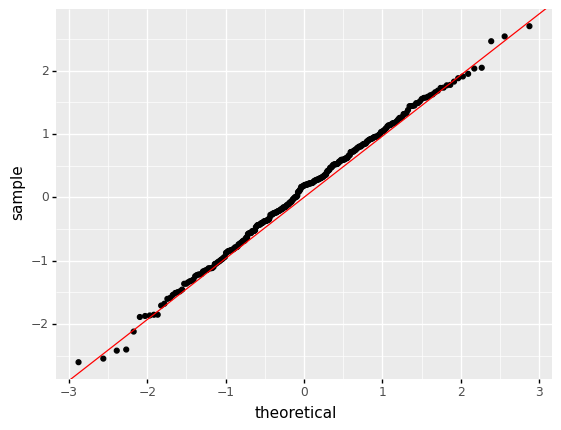

<ggplot: (-9223372036518846029)>

In [192]:
assump["random1"] = np.random.normal(0,1,len(Y))
(ggplot(assump, aes(sample = "random1")) + stat_qq() + geom_abline(intercept = 0, slope = np.std(assump["random1"]), color = "red"))

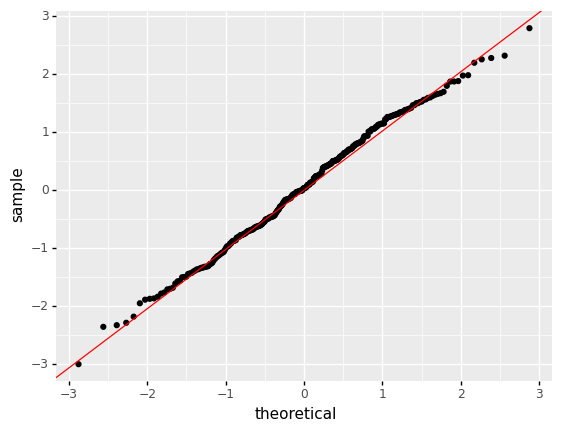

<ggplot: (335627300)>

In [193]:
assump["random2"] = np.random.normal(0,1,len(Y))
(ggplot(assump, aes(sample = "random2")) + stat_qq() + geom_abline(intercept = 0, slope = np.std(assump["random2"]), color = "red"))

##### Homoskedasticity and Omnibus Linearity

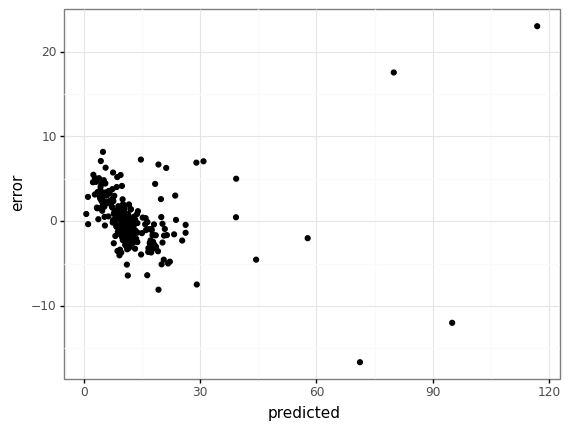

<ggplot: (-9223372036519156280)>

In [194]:
ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw()

# what are we looking for? Heteroskedasticity and linearity

##### Linearity

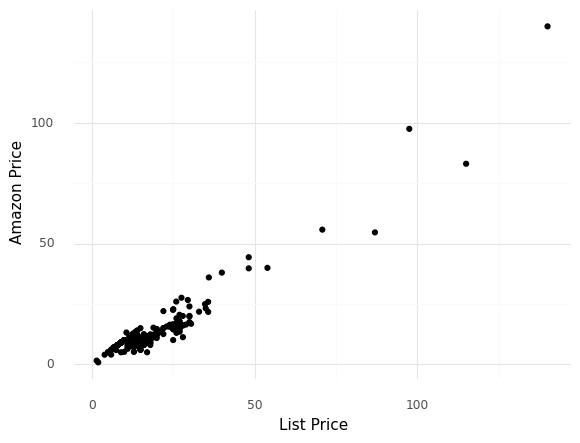

<ggplot: (335958557)>

In [195]:
(ggplot(ama, aes(x = "List Price", y = "Amazon Price")) + geom_point() + theme_minimal()) #repeat for each predictor

#### Examples

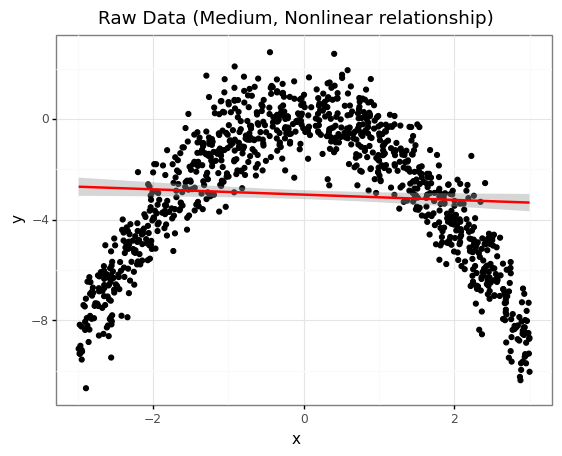

<ggplot: (333185200)>

In [196]:
# medium relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = -1*x**2 + np.random.normal(loc = 0, scale = 1, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") +
labs(title = "Raw Data (Medium, Nonlinear relationship)"))

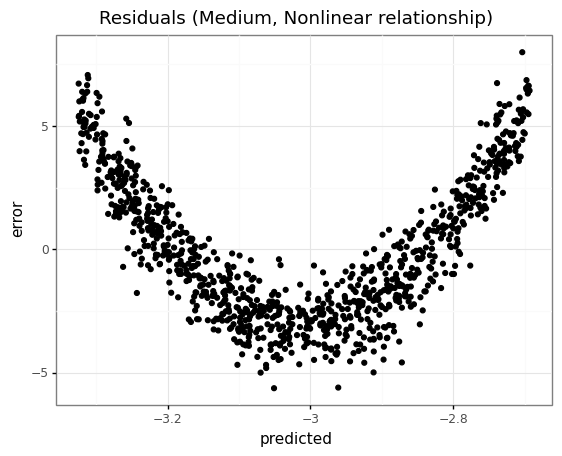

<ggplot: (-9223372036518829922)>

In [197]:
# what do you think the residuals will look like?

# create model
LR = LinearRegression()

# separate predictors and outcome
X = np.array(df['x']).reshape(-1, 1) #we have to do this because there's only 1 predictor
y = df['y']

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Medium, Nonlinear relationship)")


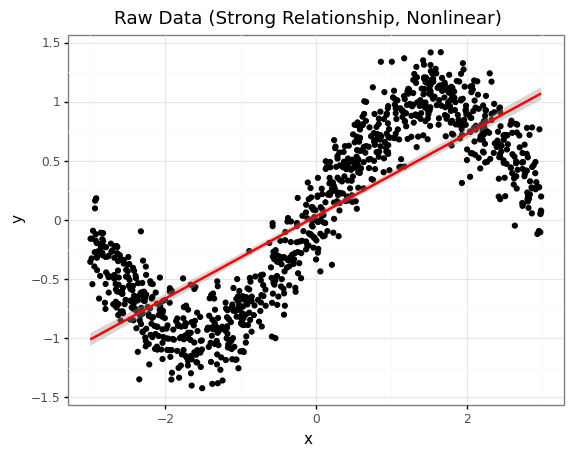

<ggplot: (-9223372036518802579)>

In [198]:
# strong relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") +
labs(title = "Raw Data (Strong Relationship, Nonlinear)"))

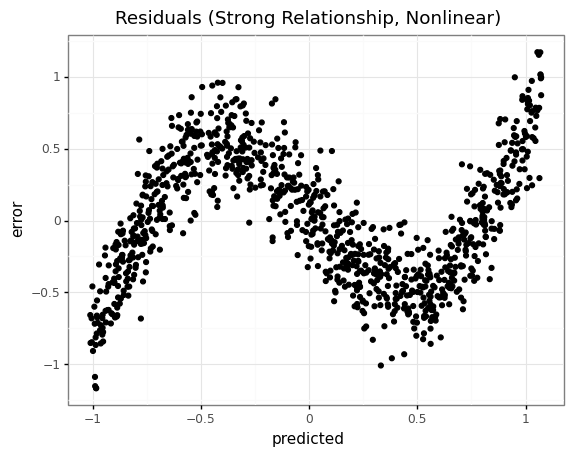

<ggplot: (335896959)>

In [199]:
# what do you think the residuals will look like?

# create model
LR = LinearRegression()

# separate predictors and outcome
X = np.array(df['x']).reshape(-1, 1) #we have to do this because there's only 1 predictor
y = df['y']

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Strong Relationship, Nonlinear)")


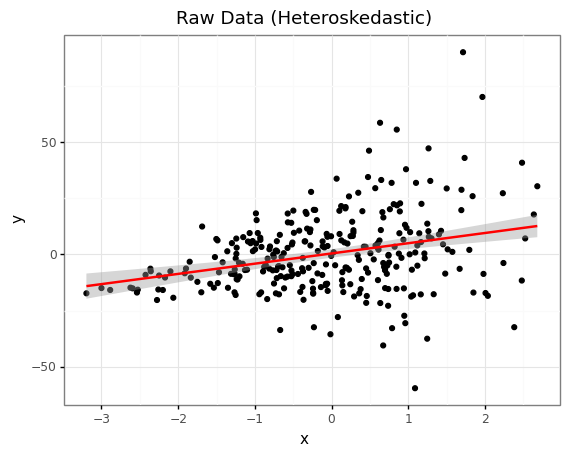

<ggplot: (335713039)>

In [200]:
# Linear, Heteroskedastic Data
x = np.random.normal(loc = 0, scale = 1, size = 300)
y = x*5.4 + (np.random.normal(loc = 0, scale = 0.1+ 5*(x - min(x))))

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") +
labs(title = "Raw Data (Heteroskedastic)"))

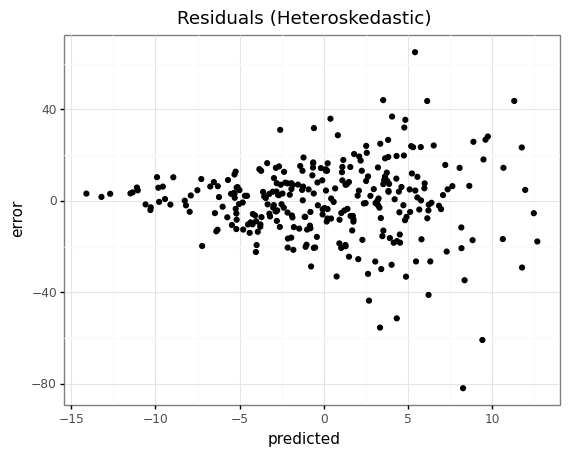

<ggplot: (-9223372036521762514)>

In [201]:
# what do you think the residuals will look like?

# create model
LR = LinearRegression()

# separate predictors and outcome
X = np.array(df['x']).reshape(-1, 1) #we have to do this because there's only 1 predictor
y = df['y']

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Heteroskedastic)")


### Pull Coefficients

In [202]:
coefficients = pd.DataFrame({"Coef":LR_Model.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [203]:
coefficients

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


### Predict

In [204]:
newBook = np.array([12.45,300,10,.8,8,5]).reshape(1,-1)
newBookz =zScore.transform(newBook) #standardize
LR_Model.predict(newBookz)

array([8.42151431])

In [205]:
newBook_inter = np.append(newBookz,1) #add intercept
newBook_inter

array([-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [206]:
np.sum(newBook_inter*np.array(coefficients["Coef"]))

8.421514307944573

# Bey (sklearn)

In [207]:
b = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
b.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


In [208]:
# Can we predict danceability?
b.columns

Index(['Unnamed: 0', 'artist_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'duration_ms', 'track_name'],
      dtype='object')

In [209]:
predictors = ["loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence"]

## Model

In [210]:
X = b[predictors]
Y = b["danceability"]

In [211]:
zScoreb = StandardScaler()
zScoreb.fit(X)

Xz = zScoreb.transform(X) 

In [212]:
BEY_mod = LinearRegression()
BEY_mod.fit(Xz,Y)

LinearRegression()

In [213]:
dance_pred = BEY_mod.predict(Xz)

mean_squared_error(Y, dance_pred)

0.012870400038096166

In [214]:
r2_score(Y, dance_pred)

0.5888425804403326

### Does adding Energy improve the fit?

In [216]:
predictors = ["energy","loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence"]
# separate data
X = b[predictors]
Y = b["danceability"]

# z score
zScoreb = StandardScaler()
zScoreb.fit(X)
Xz = zScoreb.transform(X) 

# create/fit model
BEY_mod = LinearRegression()
BEY_mod.fit(Xz,Y)

# predictions
dance_pred = BEY_mod.predict(Xz)

# model performance
print("MSE:", mean_squared_error(Y, dance_pred))

print("R2:", r2_score(Y, dance_pred))

MSE: 0.012562902640532302
R2: 0.5986658832226425


## Prediction

In [217]:
coefficients = pd.DataFrame({"Coef":BEY_mod.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": BEY_mod.intercept_,
                    "Name": "intercept"}, ignore_index = True)

coefficients
#for reference: https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc

,Coef,Name
0,-0.034683,energy
1,0.021811,loudness
2,-0.000348,speechiness
3,-0.069230,acousticness
4,-0.007439,instrumentalness
5,-0.030047,liveness
6,0.091763,valence
7,0.567572,intercept


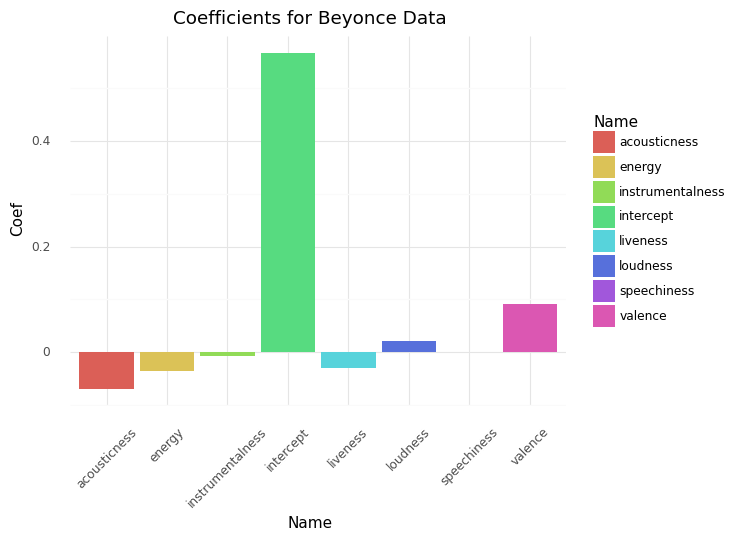

<ggplot: (333463686)>

In [218]:
(ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name")) + geom_bar(stat = "identity") + theme_minimal() + labs(title = "Coefficients for Beyonce Data") + theme(axis_text_x = element_text(angle = 45)))